## 1. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# 读取上传的CSV文件
relation_file_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/Relation_Data(478)/classified_by_gics_sub_industry_sp500_tickers_478.csv'
sp500_tickers_478_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/Relation_Data(478)/sp500_tickers_478.csv'

sp500_data = pd.read_csv(sp500_tickers_478_path)

# 查看数据的前几行和基本信息
sp500_data.head()

,Ticker,GICS Sector,GICS Sub-Industry
0,MMM,Industrials,Industrial Conglomerates
1,AOS,Industrials,Building Products
2,ABT,Health Care,Health Care Equipment
3,ABBV,Health Care,Biotechnology
4,ACN,Information Technology,IT Consulting & Other Services


In [3]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ticker             478 non-null    object
 1   GICS Sector        478 non-null    object
 2   GICS Sub-Industry  478 non-null    object
dtypes: object(3)
memory usage: 11.3+ KB


In [4]:
sp500_data.describe()

,Ticker,GICS Sector,GICS Sub-Industry
count,478,478,478
unique,478,11,124
top,MMM,Financials,Health Care Equipment
freq,1,71,17


In [6]:
# 分析GICS行业的分布
sector_distribution = sp500_data['GICS Sector'].value_counts()
sector_distribution

Financials                71
Industrials               70
Health Care               62
Information Technology    62
Consumer Discretionary    51
Consumer Staples          35
Utilities                 29
Real Estate               29
Materials                 26
Energy                    23
Communication Services    20
Name: GICS Sector, dtype: int64

In [7]:
Sub_Sector_distribution = sp500_data['GICS Sub-Industry'].value_counts()

Sub_Sector_distribution

Health Care Equipment                           17
Semiconductors                                  15
Electric Utilities                              13
Multi-Utilities                                 12
Industrial Machinery & Supplies & Components    11
                                                ..
Reinsurance                                      1
Consumer Electronics                             1
Copper                                           1
Water Utilities                                  1
Household Appliances                             1
Name: GICS Sub-Industry, Length: 124, dtype: int64

In [12]:
# 行业内的股票数量大于1的GICS Sub-Industry行业的个数
Sub_Sector_distribution[Sub_Sector_distribution > 1].count()

96

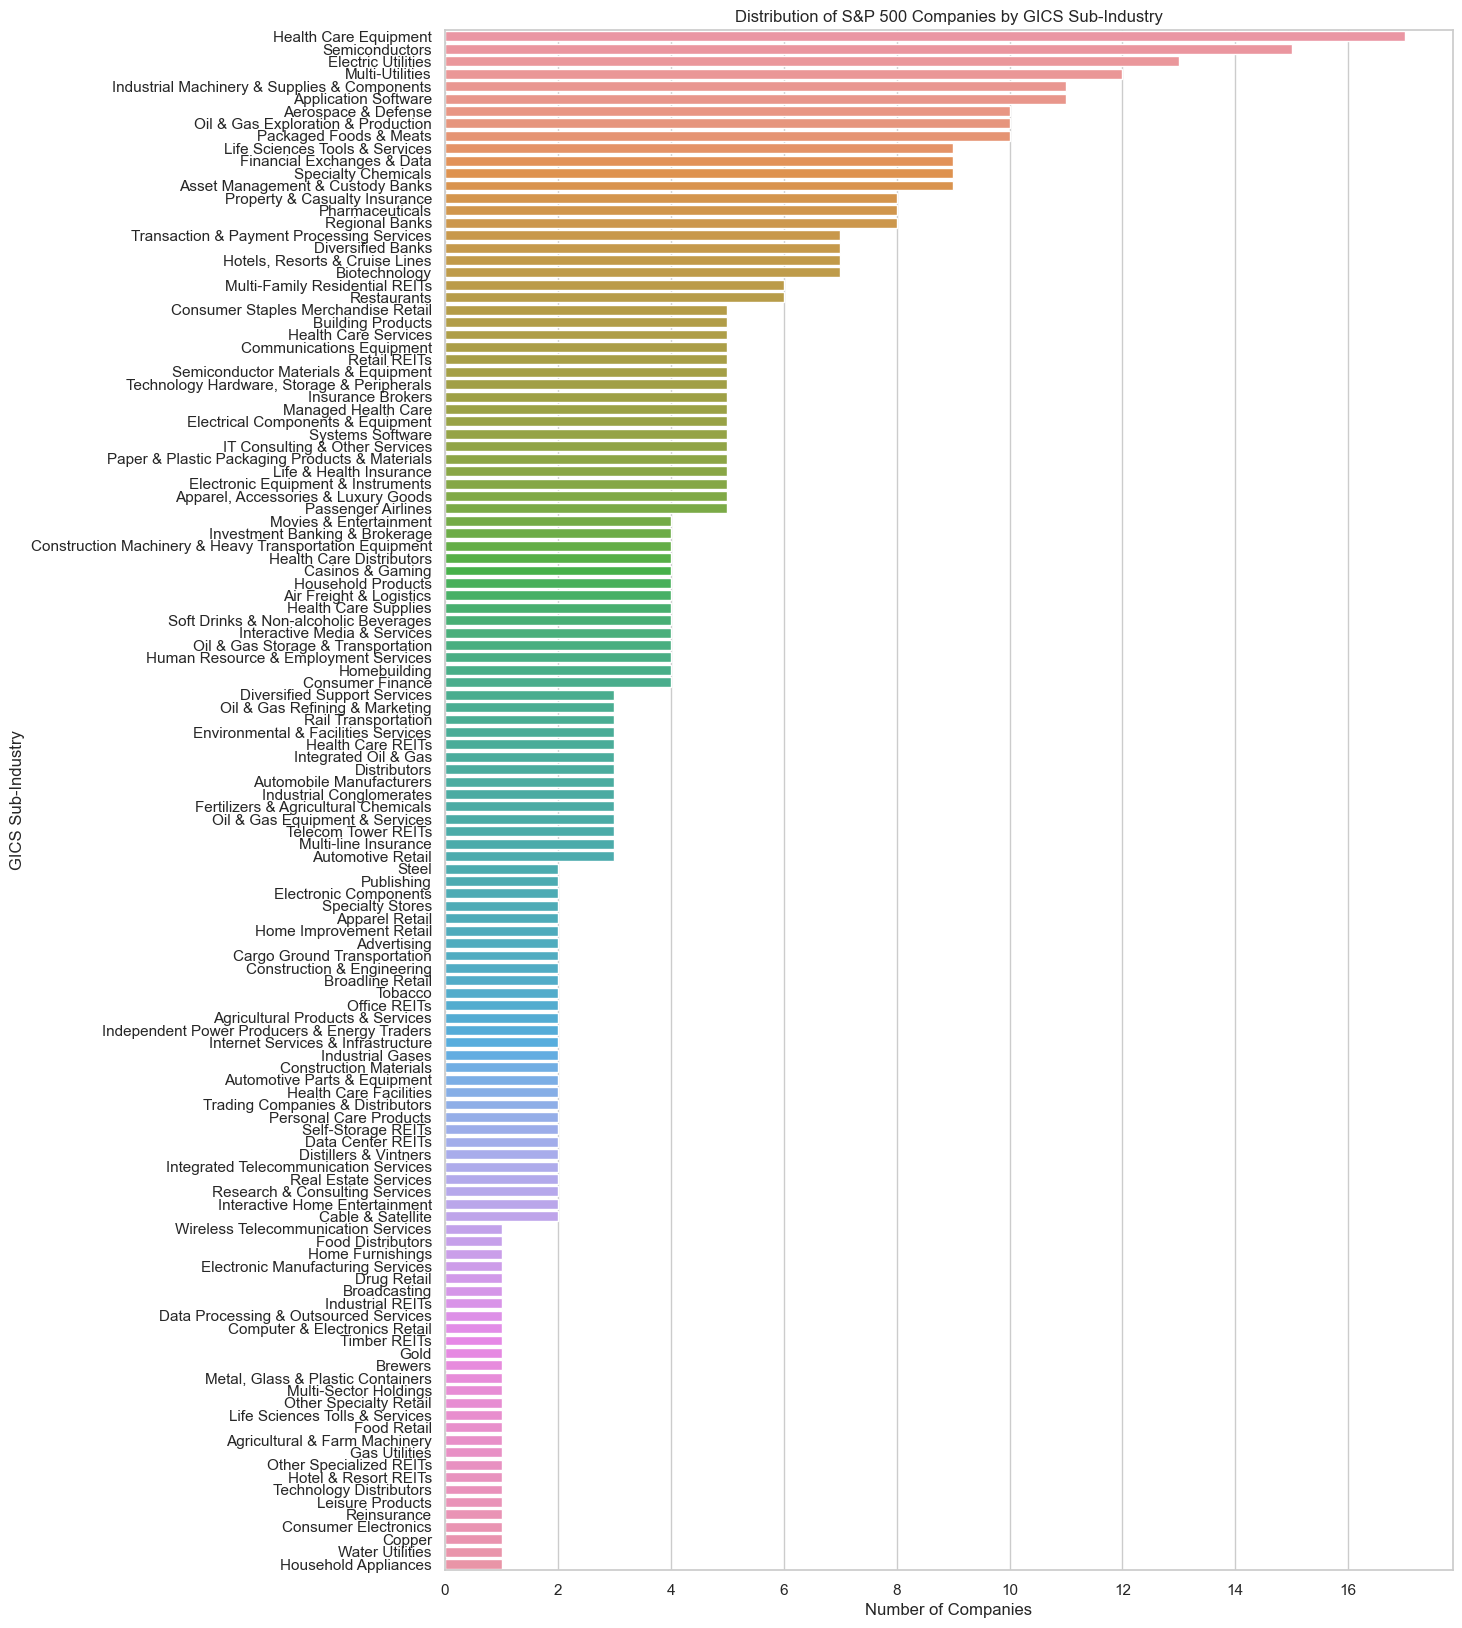

In [8]:
# 计算GICS子行业的分布
sub_sector_distribution = sp500_data['GICS Sub-Industry'].value_counts()

# 设置绘图样式
sns.set(style="whitegrid")

# 绘制GICS子行业的分布
plt.figure(figsize=(13, 20))
sub_sector_distribution_plot = sns.barplot(x=sub_sector_distribution.values, y=sub_sector_distribution.index)
plt.title('Distribution of S&P 500 Companies by GICS Sub-Industry')
plt.xlabel('Number of Companies')
plt.ylabel('GICS Sub-Industry')

# 显示图表
plt.show()

In [9]:
# 设置文件夹路径
folder_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/S&P500_original_data'

# 初始化股票代码和形状列表
qualified_tickers = []
unqualified_tickers = []

# 假设所有股票在同一交易日内进行交易，计算总交易日数
sample_file = next((filename for filename in os.listdir(folder_path) if filename.endswith('.csv')), None)
if sample_file:
    sample_data = pd.read_csv(os.path.join(folder_path, sample_file))
    total_trading_days = len(sample_data)

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        try:
            # 读取CSV文件
            data = pd.read_csv(file_path)
            ticker_info = (filename.split('.')[0], data.shape)  # 假设文件名是股票代码
            # 计算交易日数量并比较
            if len(data) / total_trading_days >= 0.98:
                qualified_tickers.append(ticker_info)
            else:
                unqualified_tickers.append(ticker_info)
        except Exception as e:
            print(f"Error reading {filename}: {e}")

# 按字母顺序排序并打印股票代码和形状
qualified_tickers.sort()
unqualified_tickers.sort()

print("Tickers traded on more than 98% of trading days:")
for i, (ticker, shape) in enumerate(qualified_tickers, 1):
    print(f"{i}. {ticker}, Shape: {shape}")

print("\nTickers NOT traded on more than 98% of trading days:")
for i, (ticker, shape) in enumerate(unqualified_tickers, 1):
    print(f"{i}. {ticker}, Shape: {shape}")


Tickers traded on more than 98% of trading days:
1. AAL_stock_data, Shape: (2244, 7)
2. AAPL_stock_data, Shape: (2244, 7)
3. ABBV_stock_data, Shape: (2244, 7)
4. ABT_stock_data, Shape: (2244, 7)
5. ACGL_stock_data, Shape: (2244, 7)
6. ACN_stock_data, Shape: (2244, 7)
7. ADBE_stock_data, Shape: (2244, 7)
8. ADI_stock_data, Shape: (2244, 7)
9. ADM_stock_data, Shape: (2244, 7)
10. ADP_stock_data, Shape: (2244, 7)
11. ADSK_stock_data, Shape: (2244, 7)
12. AEE_stock_data, Shape: (2244, 7)
13. AEP_stock_data, Shape: (2244, 7)
14. AES_stock_data, Shape: (2244, 7)
15. AFL_stock_data, Shape: (2244, 7)
16. AIG_stock_data, Shape: (2244, 7)
17. AIZ_stock_data, Shape: (2244, 7)
18. AJG_stock_data, Shape: (2244, 7)
19. AKAM_stock_data, Shape: (2244, 7)
20. ALB_stock_data, Shape: (2244, 7)
21. ALGN_stock_data, Shape: (2244, 7)
22. ALK_stock_data, Shape: (2244, 7)
23. ALLE_stock_data, Shape: (2244, 7)
24. ALL_stock_data, Shape: (2244, 7)
25. AMAT_stock_data, Shape: (2244, 7)
26. AMCR_stock_data, Shape

### Summary：S&P500中一共有503支股票，符合条件：have been traded on more than 98% of trading days 的股票一共有478支，不符合条件的股票有25支。

## 生成S&P500_aver_line_dates.csv

In [13]:
import pandas as pd

# 读取上传的文件
file_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/S&P500_original_data/AAPL_stock_data.csv'

# 读取CSV文件，不包括标题行
df = pd.read_csv(file_path, header=None, skiprows=1)

# 保留第一列（日期数据）
df_dates = df.iloc[:, 0]

# 保存处理后的文件
output_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/S&P500_aver_line_dates.csv'
df_dates.to_csv(output_path, index=False, header=False)

output_path


'/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/S&P500_aver_line_dates.csv'